In [1]:
import rospy
from sensor_msgs.msg import JointState
from std_msgs.msg import Header
import numpy as np
import roslib
import tf

In [2]:
def subsample(X,N):
    '''Subsample in N iterations the trajectory X. The output is a 
    trajectory similar to X with N points. '''
    nx  = X.shape[0]
    idx = np.arange(float(N))/(N-1)*(nx-1)
    hx  = []
    for i in idx:
        i0 = int(np.floor(i))
        i1 = int(np.ceil(i))
        di = i%1
        x  = X[i0,:]*(1-di) + X[i1,:]*di
        hx.append(x)
    return np.vstack(hx)

## Visualizing TALOS

#### Start Instruction

roslaunch talos_description upload.launch

rosrun robot_state_publisher robot_state_publisher

rosrun rviz rviz

#### Setting up ROS variables 

In [3]:
pub = rospy.Publisher('joint_states', JointState, queue_size=10)
rospy.init_node('joint_state_publisher')
rate = rospy.Rate(200) # 10hz

hello_str = JointState()
hello_str.header = Header()
hello_str.header.stamp = rospy.Time.now()
hello_str.name = ['leg_left_1_joint','leg_left_2_joint','leg_left_3_joint','leg_left_4_joint','leg_left_5_joint',
'leg_left_6_joint','leg_right_1_joint','leg_right_2_joint','leg_right_3_joint',
'leg_right_4_joint','leg_right_5_joint','leg_right_6_joint','torso_1_joint',
'torso_2_joint','arm_left_1_joint','arm_left_2_joint','arm_left_3_joint',
'arm_left_4_joint','arm_left_5_joint','arm_left_6_joint','arm_left_7_joint',
'gripper_left_joint','arm_right_1_joint','arm_right_2_joint','arm_right_3_joint',
'arm_right_4_joint','arm_right_5_joint','arm_right_6_joint','arm_right_7_joint',
'gripper_right_joint','head_1_joint','head_2_joint']
br = tf.TransformBroadcaster()

#### Publishing the world frame w.r.t. the stairs

In [4]:
br.sendTransform((0,0,0),
                 (0,0,0,1),
                 rospy.Time.now(),
                 "stairs_link",
                 "world"
                 )
rate.sleep()

#### Loading the file

In [10]:
import matplotlib.pyplot as plt

In [25]:
traj = np.vstack(traj)

In [26]:
traj.shape

(5959, 40)

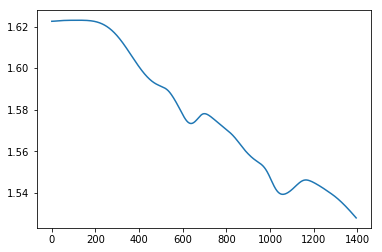

In [18]:
plt.plot(traj[:,3])

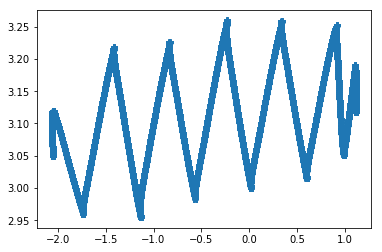

In [28]:
plt.plot(traj[:,1], traj[:,2],'*')

In [23]:
from os import listdir
file_name = 'talos_nav/9'
root_file ='/media/teguh/Data/MEMMO Dataset/'

 


#taking file name from harddisk
#root_file = '/media/rli/ELLA GOLD/Teguh Files/MEMMO Dataset/dataset-talos_stairs_bauzil-0.9.1/dataset/talos_stairs_bauzil/'
#root_file = '/media/rli/ELLA GOLD/Teguh Files/MEMMO Dataset/dataset-talos_nav_bauzil-0.9.1/dataset/talos_nav_bauzil/'
#

#file_names = listdir(root_file)
#size_data = 1
#indexes = np.random.randint(len(file_names), size=size_data)
#file_name = np.array(file_names)[indexes][0]

#file_name = 'b5545845-3cb7-4fd2-9a88-bdc2bbf50599'

f = open(root_file + file_name + '/infos.log','rb')
lines = f.readlines()
for line in lines:
   print line

data= lines[1]
print data
def clean_data(data):
    data= data.replace('[','')
    data=data.replace(']','')
    data=data.replace('=','')
    data=data.replace(',','')
    data=data.replace('\n','')
    data=data.replace('  ',' ')
    data=data.replace('  ',' ')
    return [float(d) for d in data.split(' ')[1:]]

goal = clean_data(data)

br.sendTransform(goal[0:3], [0,0,0,1],
                 rospy.Time.now(),
                 "init",
                 "world"
                 )

#### Sending to rviz

#f = open(root_file + file_name + '/talos_flatGround_config.csv','rb')
f = open(root_file + file_name + '/talos_nav_config.csv','rb')
lines = f.readlines()
traj = []
for line in lines:
  traj.append(np.array([float(l) for l in line.split()])[np.newaxis,:])

print len(traj)


for traj_i in traj:
  hello_str.header.stamp = rospy.Time.now()
  hello_str.position = traj_i[0,8:].tolist()
  hello_str.velocity = []
  hello_str.effort = []
  
  br.sendTransform((traj_i[0,1:4].tolist()),
                 (traj_i[0,4:8].tolist()),
                 rospy.Time.now(),
                 "base_link",
                 "world"
                 )
  pub.publish(hello_str)
  rate.sleep()


q_init= [-2.044925322264864, 3.0492393201912007, 0.98]

q_goal= [1.1296537500012915, 3.1171113005918967, 0.98]

q_goal_reached= [1.1296487500012915, 3.117111227148201, 0.98]

q_init= [-2.044905322264864, 3.0492396150507566, 0.98, 0.9999728346349878, 0.0, 0.0, 0.0073708881464417675]

q_goal= [1.1296337500012914, 3.117111006817114, 0.98, 0.9999730341177323, 0.0, 0.0, 0.0073437754170936325]

Planning_success: True

Ctc_gen_success: True

Ctc_gen_reached_the_goal: True

Muscod_success: True

Muscod_kin_feasible: True

End_effector_feasible:True

end_effector_traj_gen_success: True

limb_rrt_was_required: False

PG_success: True

PG_reached_goal: True

q_goal= [1.1296537500012915, 3.1171113005918967, 0.98]

5959


KeyboardInterrupt: 

In [98]:
file_name

'b5545845-3cb7-4fd2-9a88-bdc2bbf50599'

### Try RBF

In [43]:
import matplotlib.pyplot as plt
import numpy.matlib
import scipy.stats

num_files = np.arange(1,11)
trajs = []
traj_lens = []
for i in num_files:
    file_name = 'talos_circle/' + str(i)
    f = open('../samples/' + file_name + '/talos_flatGround_config.csv','rb')
    lines = f.readlines()
    traj = []
    for line in lines:
      traj.append(np.array([float(l) for l in line.split()])[np.newaxis,:])

    traj = np.concatenate(traj)
    traj_lens.append(len(traj))
    traj = subsample(traj,4000)
    trajs.append(traj)

####  Define the RBF

In [85]:
dof= 40
nbStates = 150
timestep = 4000
tList = np.arange(timestep)

Mu = np.linspace(tList[0]-400, tList[-1]+400, nbStates)
Sigma  = np.reshape(np.matlib.repmat(35, 1, nbStates),[1, 1, nbStates])
Sigma.shape
Phi = np.zeros((timestep, nbStates))
for i in range(nbStates):
    Phi[:,i] = scipy.stats.norm(Mu[i], Sigma[0,0,i]).pdf(tList)
#Psi = np.kron(np.eye(dof), Phi)
#y_rbf = np.dot(np.linalg.pinv(Psi), y_init.T).T
print Phi.shape

(4000, 150)


####  Try for one DOF

#### Try for one traj

In [89]:
traj = trajs[6]
w_traj,_,_,_ = np.linalg.lstsq(Phi, traj, rcond=0.0001)
traj_rbf = np.dot(Phi,w_traj)
print np.linalg.norm(traj[:,2]-traj_rbf[:,2])

0.000591598737261


In [90]:
print np.max(w_traj)

537.280558977


#### Visualize one dataset after the compression

In [91]:
'''goal[:,2] = 1
br.sendTransform(goal.flatten(), [0,0,0,1],
                 rospy.Time.now(),
                 "init",
                 "world"
                 )
'''


for i in range(traj_rbf.shape[0]):
    traj_i = traj_rbf[i:i+1,:]
    
    hello_str.header.stamp = rospy.Time.now()
    hello_str.position = traj_i[0,8:].tolist()
    hello_str.velocity = []
    hello_str.effort = []
    
    
    quat = traj_i[0,4:8]
    quat = quat/np.linalg.norm(quat)
    br.sendTransform((traj_i[0,1:4].tolist()),
                 (quat.tolist()),
                 rospy.Time.now(),
                 "base_link",
                 "world"
                 )
    pub.publish(hello_str)
    rate.sleep()

#### Loading the file

In [96]:
file_name = 'talos_circle/3'

In [97]:
f = open('../samples/' + file_name + '/infos.log','rb')
lines = f.readlines()
alpha_raw = lines[0]
alpha = float(alpha_raw.split(' ')[1])

goal_raw= lines[1]
def clean_data(data):
    data= data.replace('[','')
    data=data.replace(']','')
    data=data.replace('=','')
    data=data.replace(',','')
    data=data.replace('\n','')
    data=data.replace('  ',' ')
    data=data.replace('  ',' ')
    return [float(d) for d in data.split(' ')[1:]]

goal = clean_data(goal_raw)
print alpha
print goal
br.sendTransform(goal[0:3], [0,0,0,1],
                 rospy.Time.now(),
                 "init",
                 "world"
                 )


1.51826495873
[0.9986205449504523, -0.05250721096060648, 1.0]


#### Sending to rviz

In [98]:
f = open('../samples/' + file_name + '/talos_flatGround_config.csv','rb')
lines = f.readlines()
traj = []
for line in lines:
    traj.append(np.array([float(l) for l in line.split()])[np.newaxis,:])
print len(traj)
traj = np.concatenate(traj)
traj = subsample(traj,4000)
w_traj,_,_,_ = np.linalg.lstsq(Phi, traj)
traj_rbf = np.dot(Phi,w_traj)
print traj_rbf.shape

3005
(4000, 40)


In [99]:
for i in range(traj_rbf.shape[0]):
    traj_i = traj_rbf[i:i+1,:]
    hello_str.header.stamp = rospy.Time.now()
    hello_str.position = traj_i[0,8:].tolist()
    hello_str.velocity = []
    hello_str.effort = []

    br.sendTransform((traj_i[0,1:4].tolist()),
                 (traj_i[0,4:8].tolist()),
                 rospy.Time.now(),
                 "base_link",
                 "world"
                 )
    pub.publish(hello_str)
    rate.sleep()

### Working with the whole dataset

####  Define the RBF

#### Functions for Dataset 

In [4]:
def clean_data(data):
    data= data.replace('[','')
    data=data.replace(']','')
    data=data.replace('=','')
    data=data.replace(',','')
    data=data.replace('\n','')
    data=data.replace('  ',' ')
    data=data.replace('  ',' ')
    return [float(d) for d in data.split(' ')[1:]]

def get_info(f):
    lines = f.readlines()
    alpha_raw = lines[0]
    alpha = float(alpha_raw.split(' ')[1])
    goal_raw= lines[1]

    goal = clean_data(goal_raw)
    goal = np.array([goal[0], goal[1], alpha])[np.newaxis,:]
    try:
        contact_success = lines[5].find('True') > 0
        PG_success = lines[11].find('True') > 0
    except:
        print 'Error in info for file' + f.name
        contact_success = False
        PG_success = False
    return goal, contact_success, PG_success

#### Open the dataset 

In [16]:
import matplotlib.pyplot as plt
import numpy.matlib
import scipy.stats
from os import listdir

#file_names = listdir('../samples/talos_circle/')
#root_file = '/media/rli/ELLA GOLD/Teguh Files/MEMMO Dataset/dataset/talos_circle/'
root_file = '../samples/talos_circle/'
file_names = listdir(root_file)
size_data = 700
indexes = np.random.randint(len(file_names), size=size_data)
file_names = np.array(file_names)


traj_lens = []
contact_successes = []
PG_successes = []
goals = []
trajs = []

goals_fail = []
trajs_fail = []


for i,file_name in enumerate(file_names):
    #access the initial positions
    f = open(root_file + file_name + '/infos.log','rb')
    goal, contact_success, PG_success = get_info(f)
    
    #access the trajectories
    f = open(root_file + file_name + '/talos_flatGround_config.csv','rb')
    lines = f.readlines()

    traj = []
    for line in lines:
      traj.append(np.array([float(l) for l in line.split()])[np.newaxis,1:])
    
    if contact_success and PG_success:
        goals.append(goal)
        PG_successes.append(PG_success)
        contact_successes.append(contact_success)
    else:
        print 'Planning ' + str(i) + ' fails'
        goals_fail.append(goal)
        traj = np.concatenate(traj)
        
        traj = subsample(traj,4000)
        traj = traj.reshape(1,-1)
        trajs_fail.append(traj)
        continue
        

    traj = np.concatenate(traj)
    traj_lens.append(len(traj))
    traj = subsample(traj,4000)
    traj = traj.reshape(1,-1)
    trajs.append(traj)
    f.close()


Error in info for file../samples/talos_circle/ce2ca8c2-6907-43b1-b566-0f684dd83368/infos.log
Planning 60 fails
Error in info for file../samples/talos_circle/d8511bd0-ad78-4da3-83fa-16ccdcd44148/infos.log
Planning 194 fails
Error in info for file../samples/talos_circle/acdbcd70-84a1-4f8e-aa18-a5c25f90b44e/infos.log
Planning 220 fails
Error in info for file../samples/talos_circle/d3c79e51-4081-4bb5-8e2f-1982ee189060/infos.log
Planning 248 fails
Error in info for file../samples/talos_circle/be68e667-a523-4160-a480-16765724a2a6/infos.log
Planning 250 fails
Error in info for file../samples/talos_circle/fa0d9ca8-e0da-42bc-999c-2e7a8037af1e/infos.log
Planning 353 fails
Error in info for file../samples/talos_circle/b75bfd99-dc38-4d87-9e47-c133f4bf6b7e/infos.log
Planning 419 fails
Error in info for file../samples/talos_circle/eaec59d1-9d26-49c0-baba-8993f03c8be2/infos.log
Planning 485 fails
Error in info for file../samples/talos_circle/d0159422-a709-4648-bc11-342f9bb6e63b/infos.log
Planning 499

In [13]:
goals_fail = np.concatenate(goals_fail)

In [19]:
goals = np.concatenate(goals)

In [31]:
data_fail = dict()
data_fail['goals'] = goals_fail
data_fail['traj'] = trajs_fail
import pickle
pickle.dump(data_fail, open('data_fail.pkl','wb'))

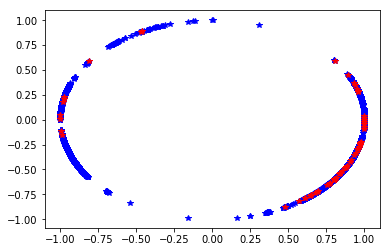

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.plot(goals[:,0],goals[:,1],'*b')
plt.plot(goals_fail[:,0],goals_fail[:,1],'*r')

/home/rli/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-1.0999748794675901,
 1.0999981512762274,
 -0.96521872270171927,
 0.97611363559184794)

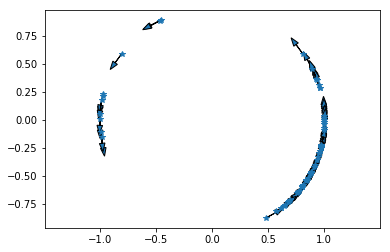

In [14]:
ax = plt.axes()
for j in range(goals_fail.shape[0]):
    ax.arrow(goals_fail[j,0],goals_fail[j,1], 0.1*np.cos(goals_fail[j,2]), 0.1*np.sin(goals_fail[j,2]), head_width=0.05)
    
plt.axis('equal')

(-1.099999788303029,
 1.0999997294425832,
 -1.0865206439315347,
 1.0993485218504397)

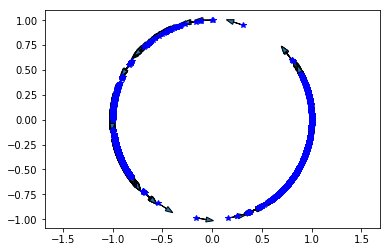

In [29]:
ax = plt.axes()
plt.plot(goals[:,0],goals[:,1],'*b')
for j in range(goals.shape[0]):
    ax.arrow(goals[j,0],goals[j,1], 0.1*np.cos(goals[j,2]), 0.1*np.sin(goals[j,2]), head_width=0.05)
    
plt.axis('equal')

[0, 6, 2000, 4500]

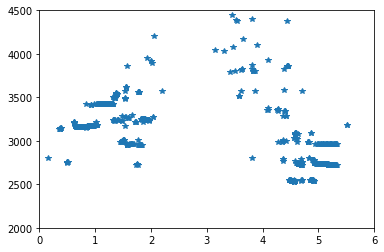

In [22]:
#%matplotlib tk
plt.plot(goals[:,2],traj_lens, '*' )
plt.axis([0,6,2000,4500])

#### Save and Load the compressed dataset 

In [23]:
from sklearn.externals import joblib


file_name = 'compressed_data.sav'
is_save = False

if is_save:
    #Save data
    data = dict()
    data['trajs'] = trajs
    data['traj_lens'] = traj_lens
    data['goals'] = goals
    data['PG'] = PG_successes
    data['ctc'] = contact_successes
    joblib.dump(data,file_name)
    f.close()
else:
    #load data
    f = open(file_name, 'rb')
    data = joblib.load(file_name)
    trajs = data['trajs']
    traj_lens = data['traj_lens']
    goals = data['goals']
    contact_successes = data['ctc']
    PG_successes = data['PG']
    
#trajs = np.concatenate(trajs)
#goals = np.concatenate(goals)

In [15]:
len(trajs)

2646

### Define the RBF 

In [12]:
import matplotlib.pyplot as plt
import numpy.matlib
import scipy.stats

dof= 39
nbStates = 150
timestep = 4000
tList = np.arange(timestep)

Mu = np.linspace(tList[0]-400, tList[-1]+400, nbStates)
Sigma  = np.reshape(np.matlib.repmat(35, 1, nbStates),[1, 1, nbStates])
Sigma.shape
Phi = np.zeros((timestep, nbStates))
for i in range(nbStates):
    Phi[:,i] = 250*scipy.stats.norm(Mu[i], Sigma[0,0,i]).pdf(tList)
#plt.plot(Phi)

### Random sample

In [13]:
n = 1000
goals = np.concatenate(goals)
indexes = np.arange(0, len(goals))
np.random.shuffle(indexes)
indexes = indexes[0:n]
goals = goals[indexes]
trajs_sampled = []
for i in indexes:
    trajs_sampled.append(trajs[i])

trajs = trajs_sampled


In [13]:
traj_joints = []
traj_poses = []

for i,traj in enumerate(trajs):
    #convert to RBF
    print i
    traj = traj.reshape(4000,-1)
    w_traj,_,_,_ = np.linalg.lstsq(Phi, traj, rcond=0.0001)
    w_traj_pose = w_traj[:,0:7]
    w_traj_joint = w_traj[:,7:]
    w_traj_pose = w_traj_pose.reshape(-1,1).T
    w_traj_joint = w_traj_joint.reshape(-1,1).T
    traj_poses.append(w_traj_pose)
    traj_joints.append(w_traj_joint)

traj_joints = np.concatenate(traj_joints)
traj_poses = np.concatenate(traj_poses)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
from sklearn.externals import joblib
file_name = 'compressed_data_edited.sav'
is_save = False

if is_save:
    #Save data
    data = dict()
    data['joints'] = traj_joints
    data['goals'] = goals
    data['poses'] = traj_poses
    joblib.dump(data,file_name)
    f.close()
else:
    #load data
    f = open(file_name, 'rb')
    data = joblib.load(file_name)
    traj_joints = data['joints']
    goals = data['goals']
    traj_poses = data['poses']
    

#### Plot the initial states 

In [16]:
goals = np.concatenate(goals)

/home/rli/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


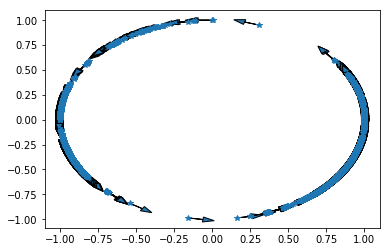

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.plot(goals[:,0],goals[:,1],'*')
ax = plt.axes()
for j in range(goals.shape[0]):
    ax.arrow(goals[j,0],goals[j,1], 0.1*np.cos(goals[j,2]), 0.1*np.sin(goals[j,2]), head_width=0.05)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(goals[:,0],goals[:,1],traj_lens, '*' )
plt.show()

#### Perform PCA on the dataset 

In [10]:
from sklearn.decomposition import PCA
joint_pca = PCA(n_components = 200)
pose_pca = PCA(n_components = 70)

joint_pca.fit(traj_joints)
pose_pca.fit(traj_poses)

print(joint_pca.explained_variance_)
print(joint_pca.singular_values_)

print(pose_pca.explained_variance_)
print(pose_pca.singular_values_)

joints_reduced = joint_pca.transform(traj_joints)
poses_reduced = pose_pca.transform(traj_poses)

[  4.39435123e-01   2.56905967e-01   1.53609248e-01   1.04659814e-01
   7.90217341e-02   6.06978099e-02   5.58490215e-02   5.04843707e-02
   4.77194179e-02   3.89665514e-02   3.41418813e-02   3.02767333e-02
   2.71496976e-02   2.61912761e-02   2.50818022e-02   2.23580783e-02
   2.11729457e-02   1.77164693e-02   1.71706001e-02   1.63661930e-02
   1.44379603e-02   1.40638190e-02   1.30795192e-02   1.10971884e-02
   1.00845272e-02   9.18752579e-03   9.01979575e-03   8.20986562e-03
   7.59229201e-03   7.37135892e-03   7.17405226e-03   6.74917478e-03
   6.63582763e-03   6.19286444e-03   5.90592328e-03   5.85909285e-03
   5.28836314e-03   4.94935753e-03   4.83380801e-03   4.75485371e-03
   4.37409495e-03   4.00400015e-03   3.96870976e-03   3.79727459e-03
   3.54029938e-03   3.31776716e-03   3.17657649e-03   3.08959444e-03
   2.99703331e-03   2.80011909e-03   2.67064524e-03   2.62128693e-03
   2.48931685e-03   2.36822884e-03   2.33115609e-03   2.11972988e-03
   2.07784856e-03   2.05177059e-03

### Nearest Neighbor 

In [11]:
def nearest(x_i, x):
    dists = []
    for x_j in x:
        dists.append(np.linalg.norm(x_i-x_j))
    max_index = np.argmin(dists)
    return max_index

def NN_predict(x_cur, x, y):
    y_index = nearest(x_cur, x)
    y_cur = y[y_index:y_index+1,:].copy()
    return y_cur

### GPR

In [98]:
import GPy

kernel_poses = GPy.kern.RBF(input_dim=3, variance=0.001,lengthscale=0.01, ARD=True) + GPy.kern.White(input_dim=3)
gpm_poses = GPy.models.GPRegression(goals, poses_reduced, kernel_poses)
gpm_poses.optimize_restarts(num_restarts=5)

kernel_joints = GPy.kern.RBF(input_dim=3, variance=0.001,lengthscale=0.01, ARD=True) + GPy.kern.White(input_dim=3)
gpm_joints = GPy.models.GPRegression(goals, joints_reduced, kernel_joints)
gpm_joints.optimize_restarts(num_restarts=5)

print gpm_poses.flattened_parameters
print gpm_joints.flattened_parameters

Optimization restart 1/5, f = -228920.591691
Optimization restart 2/5, f = -228920.354648
Optimization restart 3/5, f = -228920.591694
Optimization restart 4/5, f = -228920.591676
Optimization restart 5/5, f = -228920.591365
Optimization restart 1/5, f = -284966.067867
Optimization restart 2/5, f = -284966.027351
Optimization restart 3/5, f = -284966.051359
Optimization restart 4/5, f = -284966.052807
Optimization restart 5/5, f = -284966.060705
[GP_regression.sum.rbf.variance:
Param([ 0.00770306]), GP_regression.sum.rbf.lengthscale:
Param([ 0.19071126,  1.20725382,  0.07426136]), GP_regression.sum.white.variance:
Param([  5.28645371e-05]), GP_regression.Gaussian_noise.variance:
Param([  4.04376364e-06])]
[GP_regression.sum.rbf.variance:
Param([ 0.01194964]), GP_regression.sum.rbf.lengthscale:
Param([  0.01743198,  10.75612354,   0.02056396]), GP_regression.sum.white.variance:
Param([ 0.00106885]), GP_regression.Gaussian_noise.variance:
Param([ 0.00106885])]


### Save GPR model

In [12]:
from sklearn.externals import joblib

file_name = 'gpr.sav'
is_save = False

if is_save:
    #Save data
    data = dict()
    data['poses'] = gpm_poses
    data['joints'] = gpm_joints
    joblib.dump(data,file_name)
    f.close()
else:
    #load data
    f = open(file_name, 'rb')
    data = joblib.load(file_name)
    gpm_poses = data['poses']
    gpm_joints = data['joints']

In [13]:
def GPM_predict(gpm,x_cur):
    y_cur, y_cov = gpm.predict(x_cur)
    return y_cur

def compute_cov_matrix(x1, x2,p):
  x1 = np.array(x1)
  if x1.ndim < 2:
    x1 = x1.reshape((len(x1),1))
  x2 = np.array(x2)
  if x2.ndim < 2:
    x2 = x2.reshape((len(x2),1))

  n1 = len(x1)
  n2 = len(x2)
    
  K = np.zeros((n1,n2))
  for i in range(n1):
    for j in range(n2):
      K[i][j] = cov_function(x1[i,:],x2[j,:],p)
      if i==j:
        K[i][j] += p[-1]      
  return K
  
def cov_function(x1, x2, p):
  phi_o = p[0]
  Phi = np.eye(len(p))*p[1:-1]
  d = np.array(x1 - x2)
  return (phi_o**2)*np.exp(-1*np.dot(d, np.dot(Phi, d.T)))

#### GPR by hand

In [18]:
p = np.array([1000,1000,1000])
K = compute_cov_matrix(goals,goals,p)
K_inv = np.linalg.inv(K)

def GPR_predict(goal,goals,trajs):
    k_x = compute_cov_matrix(goal, goals,p)
    m = 0 + np.dot(k_x, np.linalg.solve(K, trajs))
    return m

#### Sklearn GPR

In [22]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

np.random.seed(1)
up_bound = 1e2
kernel = C(5, (1e-3, 1e3))* RBF((3)*[1],3*[(1e-3, up_bound)]) + WhiteKernel(noise_level=0.01,noise_level_bounds=(1e-05, 100) )
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(goals, poses_reduced)

def GP_predict(gp, x_cur):
    y_cur = gp.predict(x_cur)
    return y_cur

kernel_joint = C(5, (1e-3, 1e3))* RBF((3)*[1],3*[(1e-3, up_bound)]) + WhiteKernel(noise_level=0.01,noise_level_bounds=(1e-05, 100) )
gp_joint = GaussianProcessRegressor(kernel=kernel_joint, n_restarts_optimizer=10)
gp_joint.fit(goals, joints_reduced)

### Sparse GPR

In [163]:
z_indexes = np.random.randint(len(goals), size=100)

Z_pose = goals[z_indexes]
print Z_pose.shape
print goals.shape
print traj_poses.shape

sparse_kernel_pose = GPy.kern.RBF(input_dim=3, variance=0.001,lengthscale=0.1, ARD=True) + GPy.kern.White(input_dim=3)
sparse_gpm_pose = GPy.models.SparseGPRegression(goals, poses_reduced, Z=Z_pose)
sparse_gpm_pose.optimize('bfgs')

Z_joint = goals[z_indexes]
sparse_kernel_joint = GPy.kern.RBF(input_dim=3, variance=0.001,lengthscale=0.1, ARD=True) + GPy.kern.White(input_dim=3)
sparse_gpm_joints = GPy.models.SparseGPRegression(goals, joints_reduced, Z=Z_joint)
sparse_gpm_joints.optimize('bfgs')



(100, 3)
(1000, 3)
(4000, 7)


In [14]:
def sparseGPM_predict(sparse_gpm,x_cur):
    y_cur, y_cov = sparse_gpm.predict(x_cur)
    return y_cur

### Save sparse GPR model

In [15]:
from sklearn.externals import joblib

file_name = 'sparse_gpr.sav'
is_save = False

if is_save:
    #Save data
    data = dict()
    data['poses'] = sparse_gpm_pose
    data['joints'] = sparse_gpm_joints
    joblib.dump(data,file_name)
    f.close()
else:
    #load data
    f = open(file_name, 'rb')
    data = joblib.load(file_name)
    sparse_gpm_pose = data['poses']
    sparse_gpm_joints = data['joints']

#### Plot the initial states 

(-1.0991366057162617,
 1.1000537183759478,
 -1.0660013983952235,
 1.0901157347499171)

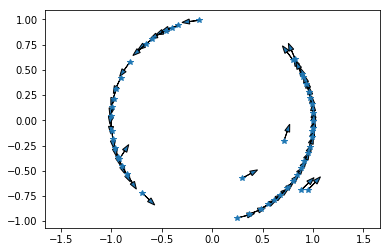

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Z = sparse_gpm_joints.Z
plt.plot(Z[:,0],Z[:,1],'*')
ax = plt.axes()
for j in range(Z.shape[0]):
    ax.arrow(Z[j,0],Z[j,1], 0.1*np.cos(Z[j,2]), 0.1*np.sin(Z[j,2]), head_width=0.05)
    
ax.axis('equal')

In [52]:
index = np.random.randint(0, goals.shape[0])
goal = goals[index:index+1,:]
print goal

[[-0.99898594  0.04502334  4.66735042]]


In [53]:
method = 'GPM'

if method == 'NN':
    #Predict by NN
    predicted_poses =  NN_predict(goal, goals, poses_reduced)
    predicted_joints = NN_predict(goal, goals, joints_reduced)
elif method == 'GPR':
    #Predict by GPR
    predicted_poses =  GP_predict(gp,goal)
    predicted_joints =  GP_predict(gp_joint, goal)
elif method == 'GPM':
    #Predict by GPM
    predicted_poses =  GPM_predict(gpm_poses, goal)
    predicted_joints =  GPM_predict(gpm_joints, goal)
elif method == 'sparseGPM':
    #Predict by GPM
    predicted_poses =  sparseGPM_predict(sparse_gpm_pose, goal)
    predicted_joints =  sparseGPM_predict(sparse_gpm_joints, goal)

In [54]:
#Convert to trajectories
predicted_poses = pose_pca.inverse_transform(predicted_poses)
predicted_poses = predicted_poses.reshape(nbStates,7)
predicted_poses = np.dot(Phi,predicted_poses)
traj_poses = predicted_poses

predicted_joints = joint_pca.inverse_transform(predicted_joints)
predicted_joints = predicted_joints.reshape(nbStates,32)
predicted_joints = np.dot(Phi,predicted_joints)
traj_joints = predicted_joints

In [55]:
goal_view = goal.copy()
goal_view[:,2] = 1
br.sendTransform(goal_view.flatten(), [0,0,0,1],
                 rospy.Time.now(),
                 "init",
                 "world"
                 )

for i in range(traj_poses.shape[0]):
    traj_pose_i = traj_poses[i:i+1,:]
    traj_joint_i = traj_joints[i:i+1,:]
    
    hello_str.header.stamp = rospy.Time.now()
    hello_str.position = traj_joint_i[0,:].tolist()
    hello_str.velocity = []
    hello_str.effort = []
    
    
    quat = traj_pose_i[0,3:7]
    quat = quat/np.linalg.norm(quat)
    print traj_pose_i[0,0:3]
    br.sendTransform((traj_pose_i[0,0:3].tolist()),
                 (quat.tolist()),
                 rospy.Time.now(),
                 "base_link",
                 "world"
                 )
    pub.publish(hello_str)
    rate.sleep()

[-1.00578679  0.04366119  1.02305964]
[-1.0057905   0.04366142  1.02306344]
[-1.00579295  0.04366157  1.02306595]
[-1.00579442  0.04366167  1.02306746]
[-1.00579513  0.04366171  1.0230682 ]
[-1.00579528  0.04366173  1.02306837]
[-1.00579504  0.04366172  1.02306814]
[-1.00579453  0.04366168  1.02306763]
[-1.00579387  0.04366164  1.02306697]
[-1.00579314  0.04366159  1.02306624]
[-1.00579241  0.04366154  1.02306551]
[-1.00579172  0.04366149  1.02306482]
[-1.00579111  0.04366144  1.02306422]
[-1.00579061  0.04366139  1.02306372]
[-1.00579021  0.04366135  1.02306333]
[-1.00578994  0.04366132  1.02306307]
[-1.00578978  0.04366129  1.02306293]
[-1.00578973  0.04366127  1.0230629 ]
[-1.00578978  0.04366125  1.02306297]
[-1.00578991  0.04366125  1.02306313]
[-1.00579012  0.04366124  1.02306336]
[-1.00579038  0.04366124  1.02306365]
[-1.00579068  0.04366125  1.02306398]
[-1.00579101  0.04366125  1.02306433]
[-1.00579134  0.04366126  1.0230647 ]
[-1.00579167  0.04366127  1.02306506]
[-1.00579199